# **Projeto - Classificação Keras**

Este projeto visa aplicar alguns conceitos de *deep learning* para a classificação de tumores benignos e malignos. Vamos ter acesso a um *dataset* com inúmeras medições de tumores e nossa tarefa será construir um rotina de classificação capaz de detectar de um tumor é maligno ou benigno.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('cancer_classification.csv')

In [117]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

O conjunto de dados apresenta 31 atributos diferentes com 569 observações. Podemos antecipar que nossa coluna alvo é a **benign_0_mal_1**. É esta coluna que queremos predizer frente a um conjunto de atributos.

In [119]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# **Análise exploratória de dados**

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

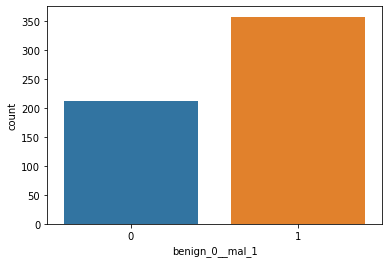

In [120]:
sns.countplot(x='benign_0__mal_1',data=df)

Observamos que há uma ocorrência maior de tumores malígnos no entanto a diferença não é tão gritante. Vamos avaliar a correlação entre o tipo de tumor com as demais *features*.

<AxesSubplot:>

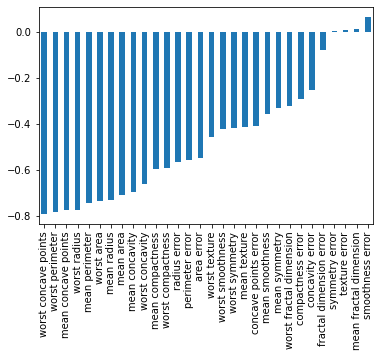

In [121]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

No plot acima exibimos a correlação dos valores atributos/features com a *target* 'benign_0__mal_1'. A última coluna não foi plotada pois resultaria na correlação do alvo com ele mesmo que naturalmente retorna 1. Vemos que existem *features* bastante correlacionadas negativamente com a *target*.  *worst concave points*,* worst perimeter* e *mean concave points* apresentam as 
maiores correlações (em valor absoluto). Outra forma bastante usual de representar correlações é através de um mapa de cor. Veja abaixo

<AxesSubplot:>

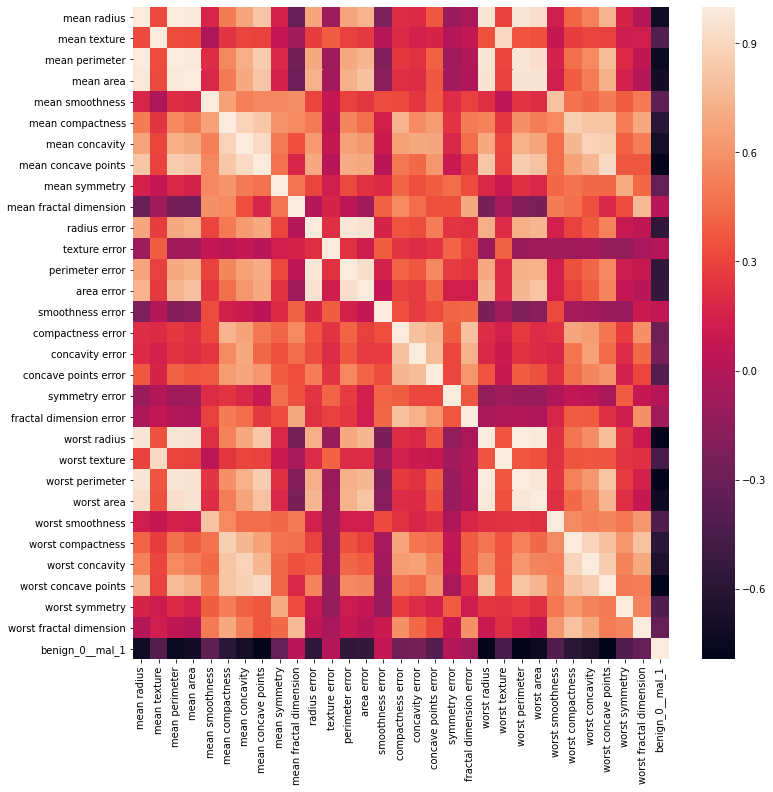

In [122]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

## **Machine Learning**

Vamos inicialmente separar nossa variável *target* das *features*. Já vimos quem são elas.

In [123]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Ok ! Feita a divisão de dados de treino e de teste vamos escalar os dados. Assim como no projeto anterior vamos usar aqui a função MinMaxScaler.

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
scaler = MinMaxScaler()

In [128]:
X_train = scaler.fit_transform(X_train)

In [129]:
X_test = scaler.fit_transform(X_test)

In [130]:
from tensorflow.keras.models import Sequential

In [131]:
from tensorflow.keras.layers import Dense,Dropout

In [132]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Usaemos aqui a mesma do projeto anterior. Criamos um modelo sequencial onde a primeira camada terá uma quantidade neurônios (*units*) iguais ao número de colunas em nosso dataset. A segunda camada terá metade do número de neurônios da primeira e a última terá somente 1
com a saída sendo 'sigmoide' devido o problema de classificação binária que temos. Este último neurônio produzirá um algo entre 0 e 1 
que decidirá se a classe é maligno ou benigno.

In [133]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 32ms/step - loss: 0.6811 - val_loss: 0.6516
Epoch 2/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6513 - val_loss: 0.6217
Epoch 3/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6227 - val_loss: 0.5887
Epoch 4/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5872 - val_loss: 0.5505
Epoch 5/600
14/14 [==============================] - 1s 54ms/step - loss: 0.5405 - val_loss: 0.5105
Epoch 6/600
14/14 [==============================] - 0s 16ms/step - loss: 0.5089 - val_loss: 0.4670
Epoch 7/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4791 - val_loss: 0.4213
Epoch 8/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4259 - val_loss: 0.3749
Epoch 9/600
14/14 [==============================] - 1s 43ms/step - loss: 0.3812 - val_loss: 0.3310
Epoch 10/600
14/14 [==============================] - 0s 14ms/step - loss: 0.3450 - val_loss: 0.2946

In [134]:
losses = pd.DataFrame(model.history.history)

In [135]:
losses

,loss,val_loss
0,0.674796,0.651622
1,0.644983,0.621664
2,0.615487,0.588682
3,0.582410,0.550461
4,0.547071,0.510514
...,...,...
595,0.016728,0.903536
596,0.015932,1.024623
597,0.016013,0.921888
598,0.016432,0.996928


Aqui tenho o loss da etapa treinamento (**loss**) e de validação (**val_loss**). Podemos agora fazer um plot e avaliar como é comportamento do loss em cada época do procedimento.

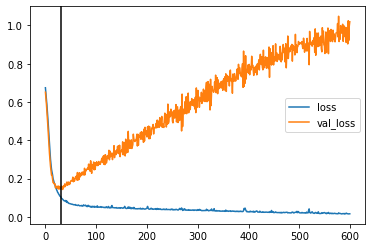

In [136]:
losses.plot()
plt.axvline(x=30,color='k')

O resultado mostra um exemplo clássico de *overfitting*.  Ou seja, nas primeiras épocas do treinamento (<30), ambos loss e val_loss diminuem com a época.  Em geral é isso que desejamos. Entretanto para valores maiores que 30, o loss de treinamento (linha azul) permanece diminuindo enquanto o loss de validação passa a aumentar. Neste caso a aumentar abruptamente inclusive. Em linhas gerais este comportamento nos mostra que estamos fazendo um overfitting no conjunto de treinamento. Observe que o processo de overfitting aumenta a medida que adicionamos épocas em nosso modelo.  Uma forma de resolver este problema é forçar uma parada antecipada. Isso é feito usando 
usando callbacks do Tensor Flow para validar o loss e então interromper o processo antes que ele fique fora de controle. 

In [137]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [138]:
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

Como vimos anteriormente o parâmetro que devemos monitorar é 'val_loss. Outro parâmetro que deve ser passado é o mode. Mode representa a forma de monitoramento e pode ser min,max e auto. Em nosso caso queremos mode='min' uma vez que desejamos minimizar o val_loss. No caso em que a propriedade monitorada é a acurácia queremos mode='max', queremos maximizar a acaurácia de nosso modelo. O parâmetro patience representa o número de épocas que desejamos esperar após detectado um ponto de parada. 

In [140]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 25ms/step - loss: 0.6880 - val_loss: 0.6736
Epoch 2/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6619 - val_loss: 0.6527
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6505 - val_loss: 0.6238
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6104 - val_loss: 0.5867
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5835 - val_loss: 0.5403
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5278 - val_loss: 0.4899
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4756 - val_loss: 0.4400
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4528 - val_loss: 0.3870
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3875 - val_loss: 0.3403
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3499 - val_loss: 0.2991
Epoch 

Nesta etapa tentamos correr 600 épocas até que o critério de parada seja acionado. Veja que early_stop foi atingido na época 49 e portanto foi finalizada a execução. Veja que antes mesmo de usar isso, vimos que a função val_loss apresentava um mínino em próximo de 30. 

In [141]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,0.681930,0.673558
1,0.661273,0.652661
2,0.638060,0.623812
3,0.609000,0.586656
4,0.572433,0.540281
5,0.529764,0.489900
6,0.480618,0.439990
7,0.431961,0.386966
8,0.385819,0.340288
9,0.343109,0.299138


<AxesSubplot:>

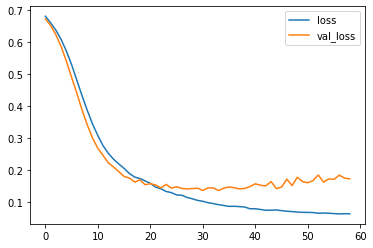

In [142]:
model_loss.plot()

Neste ponto temos o valor ótimo de épocas as serem usadas em nosso modelo é 49. A última etapa que devemos realizar para evitar o *overffiting* é adicionar camadas de abandono (*dropout layers*). Lembrando que as *dropout layers* desativam uma porcetagem de neurônios aleatóriamente. Fazemos isso adicionando entre as chamadas model.add(Dense) a função model.add(Dropout). Vamos selecionar metade dos neurônios de cada camada. 

In [143]:
from tensorflow.keras.layers import Dropout

In [144]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [145]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 23ms/step - loss: 0.6952 - val_loss: 0.6596
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6604 - val_loss: 0.6470
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6700 - val_loss: 0.6335
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6558 - val_loss: 0.6230
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6547 - val_loss: 0.6133
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6434 - val_loss: 0.5979
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6181 - val_loss: 0.5800
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6269 - val_loss: 0.5579
Epoch 9/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5811 - val_loss: 0.5368
Epoch 10/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5759 - val_loss: 0.5179
Epoch

<AxesSubplot:>

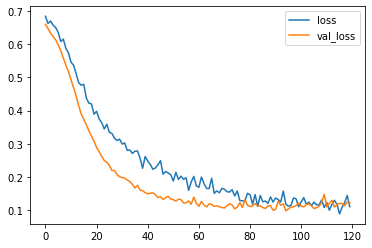

In [146]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Observe como a qualidade de nosso procedimento melhorou absurdamente. Agora temos um validation_loss que diminui com as épocas e sobretudo diminui na mesma taxa que loss. É justamente um tipo de comportamente como este que esperamos neste tipo de procedimendo. Vamos agora obter o resultado do processo de classificação que iniciamos. 

In [152]:
predictions = model.predict_classes(X_test)

In [149]:
from sklearn.metrics import classification_report,confusion_matrix

In [153]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



Observamos que nosso modelo obteve um excelente performance. 

In [154]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]


observe que nossa rede classificou incorretamente 6 pontos em nosso conjunto de teste. Apesar disso nosso modelo apresenta uma performance muito boa. Veja que a acurárica chega a 0.96 e neste caso a acurácia é uma boa métrica ja que vimos que tinhamos classes relativamente balanceadas. 